In [5]:
import networkx as nx
from tqdm import tqdm
from pprint import pprint
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import community

In [2]:
path = "./tests/new_tweets/"

In [3]:
files = [i for i in os.listdir(path) if os.path.isfile(path+i) and ".json" in i]

In [4]:
with_replies = []
for file in tqdm(files):
    
    tweet = json.load(open(path+file))
    if tweet["in_reply_to_status_id"] != None:
        with_replies.append(file)

100%|█████████████████████████████████████████████████████████████████████████████| 1686/1686 [00:03<00:00, 458.40it/s]


In [22]:
# pprint(json.load(open(path+'1430024152518430720.json')))

In [23]:
len(with_replies)

899

In [24]:
# pprint(json.load(open(path+files[0])))

In [36]:
network = nx.DiGraph()

In [37]:
lst = [i for i in range(1,21)]

In [48]:
network.add_edge(1, 2, kind="reply")
network.add_edge(2, 3, kind="reply")
network.add_edge(4, 3, kind="reply")
network.add_edge(5, 6, kind="reply")
network.add_edge(3, 5, kind="reply")
network.add_edge(7, 8, kind="reply")
network.add_edge(9, 10, kind="reply")
network.add_edge(4, 9, kind="reply")
network.add_edge(3, 7, kind="reply")
network.add_edge(8, 3, kind="reply")
network.add_edge(4, 7, kind="reply")
network.add_node(11)
network.add_node(12)
network.add_node(13)
network.add_node(14)
network.add_node(3)
network.add_node(1)
network.add_node(7)
network.add_node(5)
network.add_node(2)

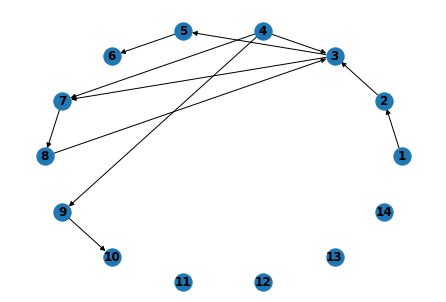

In [49]:
nx.draw_circular(network, with_labels=True, font_weight='bold')

In [59]:
partition = community.best_partition(network.to_undirected())
for node_id in partition:
    network.nodes[node_id]["community"] = partition[node_id]

In [60]:
partition

{1: 1,
 2: 1,
 3: 7,
 4: 7,
 5: 4,
 6: 4,
 7: 7,
 8: 7,
 9: 0,
 10: 0,
 11: 2,
 12: 3,
 13: 5,
 14: 6}

In [62]:
network.nodes[10]

{'community': 0}